# K-means Project Tutorial

**Objetivo de la tarea:** Crear 6 clusters de alojamientos, basandose en las coordenadas (longitud y latitud) y la columna "medincome".

## Step 1: Instalar librerías

In [1]:
! pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 132.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 152.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 108.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 28.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 131.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 161.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 167.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 93.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [18]:
# se importan librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Step 2: Cargar datos

In [3]:
# cargo datos
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [4]:
# miro el dataset
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# guardo el dataset original
df_raw.to_csv('../data/raw/datos_originales.csv', index = False)

In [19]:
# se crea nuevo data frame sólo con columnas de interés
df = df_raw[['Latitude', 'Longitude', 'MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [20]:
df.shape

(20640, 3)

El dataset a utilizar contiene 20640 filas y 3 columnas 

In [21]:
# miro su información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


No hay valores faltantes

In [22]:
df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


Los valores de latitud y longitud no parecen tener outliers, llama la atención el máximo de MedInc.

<AxesSubplot:>

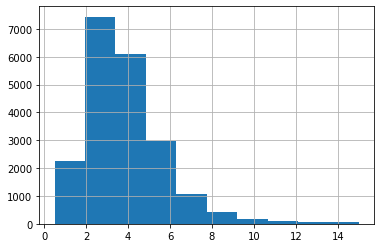

In [23]:
# miro histograma de MedInc
df.MedInc.hist()

Si bien hay pocos valores mayores a 10, no me llama la atención.

## Step 3: aplicar K-means

In [28]:
# normalizo las variables
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
df_scaled.shape

(20640, 3)

In [31]:
df_scaled

array([[0.5674814 , 0.21115538, 0.53966842],
       [0.565356  , 0.21215139, 0.53802706],
       [0.5642933 , 0.21015936, 0.46602805],
       ...,
       [0.73219979, 0.31175299, 0.08276438],
       [0.73219979, 0.30179283, 0.09429525],
       [0.72582359, 0.30976096, 0.13025338]])

In [32]:
# ajusto modelo K-means al dataset
clus = KMeans(n_clusters = 6, random_state = 308)
clus.fit(df_scaled)

KMeans(n_clusters=6, random_state=308)

In [36]:
# predicción de todo el dataset
pred = clus.predict(df_scaled)
pred

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

## Step 4: Agrego variable 'cluster' a dataset

In [37]:
# creo variable cluster, lo agrego al dataset original
df['cluster'] = pd.Categorical(pred)

/tmp/ipykernel_1868/641933427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = pd.Categorical(pred)


In [38]:
# miro el resultado
df.head()

,Latitude,Longitude,MedInc,cluster
0,37.88,-122.23,8.3252,3
1,37.86,-122.22,8.3014,3
2,37.85,-122.24,7.2574,3
3,37.85,-122.25,5.6431,3
4,37.85,-122.25,3.8462,5


In [39]:
# agrupación
df.cluster.value_counts(sort = False)

0    2986
1     888
2    8133
3    1977
4    1709
5    4947
Name: cluster, dtype: int64

In [40]:
# verifico clases
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Latitude   20640 non-null  float64 
 1   Longitude  20640 non-null  float64 
 2   MedInc     20640 non-null  float64 
 3   cluster    20640 non-null  category
dtypes: category(1), float64(3)
memory usage: 504.2 KB


<AxesSubplot:xlabel='cluster', ylabel='MedInc'>

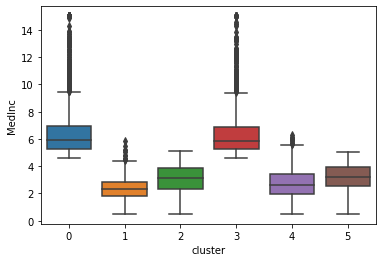

In [41]:
# miro distribucion de MedInc según cluster
sns.boxplot(x = 'cluster', y = 'MedInc', data = df)

Se aprecian algunas diferencias entre clusters respecto a la variable MedInc, no sé si justifica que sean 6 clusters, pero es lo que se pidió

In [42]:
# guardo el dataset con el cluster
df.to_csv('../data/processed/datos_finales.csv', index = False)

## Step 5: Grafico clusters

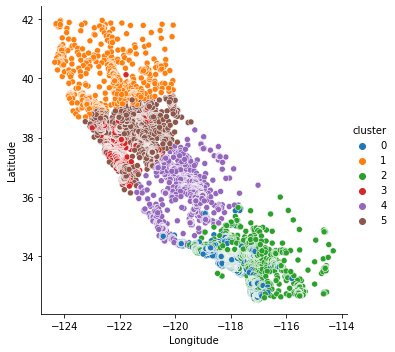

In [43]:
# gráfico clusters
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'cluster', data = df)

En la figura se puede apreciar la influencia de las coordenadas en la definición de los clusters. No es perfecta la división porque también participa otra variable en la definición.